In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score


In [17]:
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
target = pd.Series(california.target, name="Price")
df = pd.concat([data, target], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
X = df.drop(columns=['Price'])
y = df['Price']

In [20]:
# split the data into train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [21]:
len(X_train)

16512

In [22]:
len(X_test)

4128

### Through Linear regression

In [23]:
# apply linear regression 

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# calculate the r2-score 
y_pred = model.predict(X_test)
r2_model = r2_score(y_test,y_pred)
print(r2_model)

0.5943232652466208


### Ridge and Lasso regression

In [39]:
from sklearn.linear_model import Ridge, Lasso

# Apply Ridge model
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [40]:
y_pred_ridge = ridge_model.predict(X_test)
r2_model_ridge = r2_score(y_pred_ridge,y_test)
print(r2_model_ridge)

0.32137445364628614


In [34]:
# lasso model
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_model_lasso = r2_score(y_pred_lasso, y_test)
print(r2_model_lasso)

-10.873366549379583


In [29]:
# identify the coefficient with bad feature
bad_features = np.where(lasso_model.coef_ ==0)[0]
print('Feature with Bad slope Results: ', list(X.columns[bad_features]))

Feature with Bad slope Results:  ['AveRooms', 'AveBedrms']


In [38]:
# remove these features
X_train_filtered = X_train.drop(X_train.columns[bad_features], axis=1)
X_test_filtered = X_test.drop(X_test.columns[bad_features], axis=1)

# apply the lasso regression on filtered data
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_filtered, y_train)
y_pred_lasso = lasso_model.predict(X_test_filtered)
r2_model_lasso = r2_score(y_pred_lasso, y_test)
print(r2_model_lasso)

0.2609961992771971


In [ ]:
class Solution(object):
    def strStr(self, haystack, needle):
        list1 = list(haystack)
        list2 = list(needle)
        for i in range(len(list1)):
            for j in range(len(list2)):
                if arr[i] == arr[j]

4


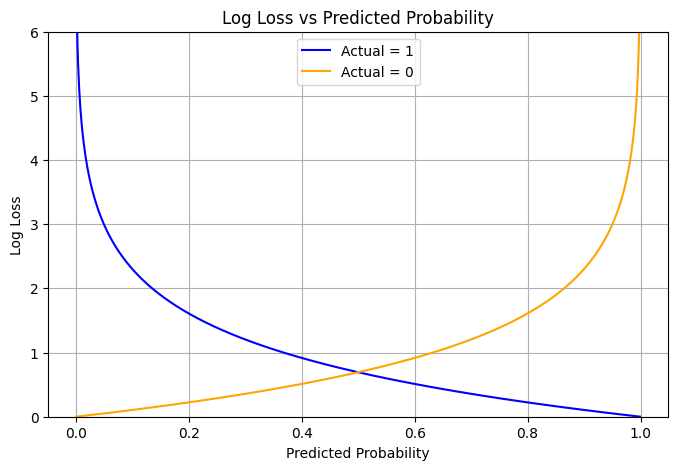

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Probabilities from 0.001 to 0.999
p = np.linspace(0.001, 0.999, 1000)

# Actual class = 1 -> loss = -log(p)
loss_for_1 = -np.log(p)

# Actual class = 0 -> loss = -log(1 - p)
loss_for_0 = -np.log(1 - p)

# Plot
plt.figure(figsize=(8,5))
plt.plot(p, loss_for_1, label="Actual = 1", color="blue")
plt.plot(p, loss_for_0, label="Actual = 0", color="orange")
plt.ylim(0, 6)
plt.xlabel("Predicted Probability")
plt.ylabel("Log Loss")
plt.title("Log Loss vs Predicted Probability")
plt.legend()
plt.grid(True)
plt.show()
